<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [6]:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
movies.duration.agg(['max', 'min'])

max    242
min     64
Name: duration, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

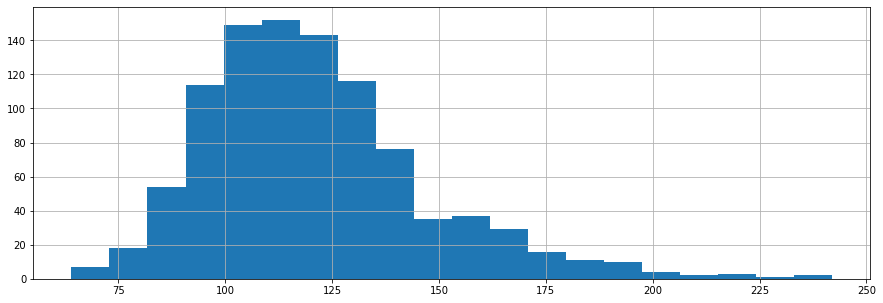

In [8]:
plot = movies.duration.hist(bins=20, figsize=(15,5))

#### Use a box plot to display that same data.

<AxesSubplot:>

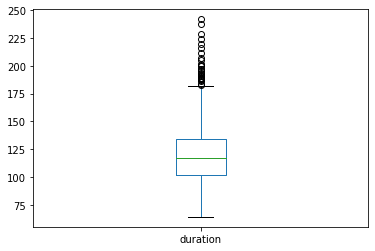

In [9]:
movies.duration.plot.box()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
movies.content_rating.notnull().sum()

976

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Count')

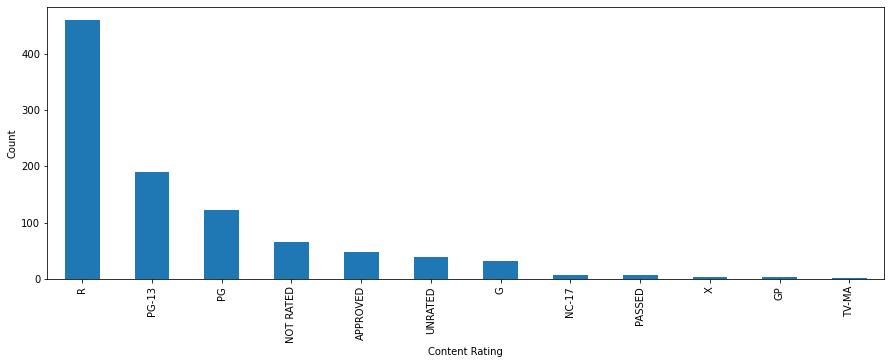

In [11]:
movies.content_rating.value_counts().plot(kind='bar', figsize=(15,5))
plt.xlabel('Content Rating')
plt.ylabel('Count')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
movies['new_content_rating'] = movies.content_rating.replace({'NOT RATED':'UNRATED', 'APPROVED':'UNRATED', 'PASSED':'UNRATED', 'GP':'UNRATED'})

In [13]:
movies.new_content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: new_content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [14]:
movies['new_content_rating'] = movies.new_content_rating.replace({'X':'NC-17', 'TV-MA':'NC-17'})

In [15]:
movies.new_content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: new_content_rating, dtype: int64

#### Count the number of missing values in each column.

In [16]:
movies.isnull().sum()

star_rating           0
title                 0
content_rating        3
genre                 0
duration              0
actors_list           0
new_content_rating    3
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [17]:
# Get the most frequent value
highest_freq_content_rating = movies.new_content_rating.mode()[0]
highest_freq_content_rating

'R'

In [18]:
# Replace null values with most frequent value
movies.new_content_rating.fillna(value=highest_freq_content_rating, inplace=True)

In [19]:
movies.new_content_rating.value_counts()

R          463
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: new_content_rating, dtype: int64

In [20]:
movies.isnull().sum()

star_rating           0
title                 0
content_rating        3
genre                 0
duration              0
actors_list           0
new_content_rating    0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [21]:
movies[movies.duration >= 120].star_rating.mean()

7.948898678414082

In [22]:
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [23]:
movies_corr = movies.corr()
movies_corr

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


<AxesSubplot:>

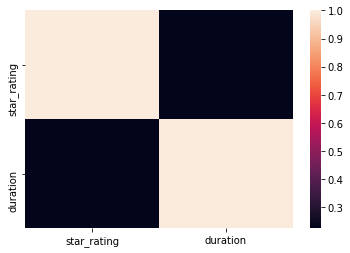

In [24]:
sns.heatmap(movies_corr)

#### Calculate the average duration for each genre.

In [25]:
movies.groupby(['genre']).duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

In [26]:
# Encode content rating labels
movies['enc_content_rating'] = movies.new_content_rating.factorize()[0]

In [27]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,new_content_rating,enc_content_rating
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",R,0
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",R,0
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",R,0
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",PG-13,1
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",R,0


In [28]:
movies.enc_content_rating.value_counts().sort_index()

0    463
1    189
2    160
3    123
4     32
5     12
Name: enc_content_rating, dtype: int64

#### Determine the top rated movie (by star rating) for each genre.

In [29]:
# Answer:
movies.groupby(['genre']).star_rating.max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [30]:
duplicated = movies[movies.title.duplicated()]['title']
duplicated

482    The Girl with the Dragon Tattoo
905                            Dracula
924                     Les Miserables
936                          True Grit
Name: title, dtype: object

In [31]:
movies[movies['title'].isin(duplicated)]

,star_rating,title,content_rating,genre,duration,actors_list,new_content_rating,enc_content_rating
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",R,0
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",R,0
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",PG-13,1
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",PG-13,1
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",UNRATED,2
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",R,0
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",PG-13,1
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",R,0


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [32]:
genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']

In [33]:
movies[movies.genre.isin(genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [34]:
genres = movies.genre.value_counts()
genres

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [35]:
# Genre value counts greater than 10
greater_than_10 = genres > 10
greater_than_10

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Thriller     False
Sci-Fi       False
Film-Noir    False
Family       False
History      False
Fantasy      False
Name: genre, dtype: bool

In [36]:
# Update to only genre with more than 10 movies
genres = genres[greater_than_10].index
genres

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery'],
      dtype='object')

In [37]:
filtered = movies['genre'].isin(genres)
filtered

0      True
1      True
2      True
3      True
4      True
       ... 
974    True
975    True
976    True
977    True
978    True
Name: genre, Length: 979, dtype: bool

In [38]:
movies[filtered].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [39]:
genres = movies.groupby('genre').star_rating.mean()

In [40]:
genres[movies.groupby('genre').title.count() > 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [41]:
genres = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genres

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Family,2,7.850000
Fantasy,1,7.700000


In [42]:
genres[genres['count'] > 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!